In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import figure
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
import glob
import seaborn as sns

#### Set directory

In [2]:
wieger = 'C:/Users/s162378/Documents//GitHub/waterschap-datachallenge/data/den bosch/sewer_data_db/data_pump_level/'

path = wieger

#### Read all datafiles and adapt to datetime

In [3]:
all_files = glob.glob(path + '/*.csv')
data = pd.DataFrame()
for filename in all_files:
    temp = pd.read_csv(filename, sep = ';')
    data = pd.concat([data, temp])
data['Tijdstip'] = pd.to_datetime(data['Datum'] + ' ' + data['Tijd'], format='%d-%m-%Y %H:%M:%S')

# Level data as integer for Helftheuvelweg
data['003: Helftheuvelweg Niveau (cm)'] = data['003: Helftheuvelweg Niveau (cm)'].apply(lambda x: x.replace(',','.')).astype(float)

C:\Users\s162378\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Visualization

#### Plot level data for Helftheuvelweg over all 1.5 years

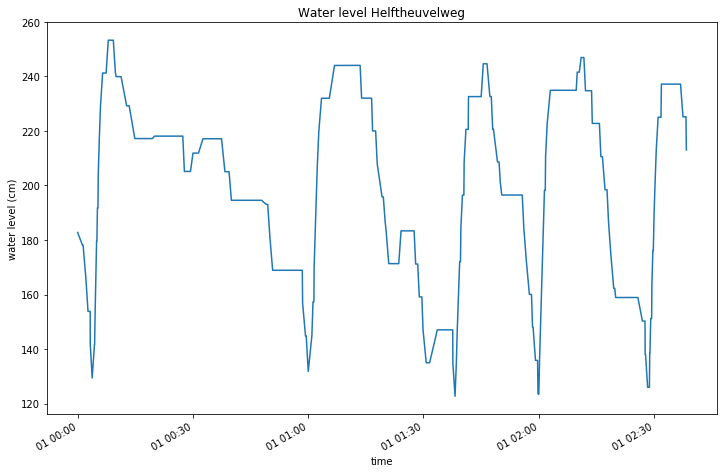

In [4]:
# Set time interval. Default is all data. [0, -1]
k = 0
l = -1

y = data['003: Helftheuvelweg Niveau (cm)'][k:l] # Level data in cm
x = data['Tijdstip'][k:l] # Time on the x axis
fig = plt.figure(figsize = (12, 8)) # Make it nice for the report
ax = fig.add_subplot(1, 1, 1)

ax.plot(x, y)
ax.set(xlabel='time', ylabel='water level (cm)', # Labeling
       title='Water level Helftheuvelweg')

plt.gcf().autofmt_xdate() # Adjusting scale of x-axis to readable, relevant datetime
plt.savefig('Helftheuvelweg regenval') # Saving to current directory
plt.show()

#### Average per week

In [11]:
data = data.set_index('Tijdstip') # Datetime index
data.head()

,Datum,Tijd,002: Oude Engelenseweg Niveau actueel (1&2)(cm),003: Helftheuvelweg Niveau (cm),004: Engelerschans Niveau trend niveau DWA(cm),005: De Rompert Niveau (cm),006: Maaspoort Niveau actueel (1&2)(cm),001: Poeldonk Neerslagmeting (mm),weekday name
Tijdstip,,,,,,,,,
2018-01-01 00:00:00,1-1-2018,00:00:00,"305,6",182.748,"263,604","292,579","122,167",0,0
2018-01-01 00:01:14,1-1-2018,00:01:14,"305,6",178.125,"263,604","292,579","122,167",0,1
2018-01-01 00:01:15,1-1-2018,00:01:15,"304,933",178.125,"263,604","292,579","122,167",0,2
2018-01-01 00:01:25,1-1-2018,00:01:25,"304,933",178.125,"261,602","292,579","122,167",0,3
2018-01-01 00:02:09,1-1-2018,00:02:09,"304,933",165.875,"261,602","292,579","122,167",0,4


In [46]:
data['weekday name'] = data.index.weekday_name # Index on day of week
#data['weekday name'].head()
monday = data[data['weekday name'] == 'Monday']
tuesday = data[data['weekday name'] == 'Tuesday']
wednesday = data[data['weekday name'] == 'Wednesday']
thursday = data[data['weekday name'] == 'Thursday']
friday = data[data['weekday name'] == 'Friday']
saturday = data[data['weekday name'] == 'Saturday']
sunday = data[data['weekday name'] == 'Sunday']

In [48]:
def plotData(data, pump, title, filename):
    data['hour'] = data.index.hour # Index on hour of day
    data_hourly_mean = data[pump].groupby(data.index.hour).mean()
    data_hourly_std = data[pump].groupby(data.index.hour).std()

    y = data_hourly_mean
    x = data_hourly_mean.index
    y_low = data_hourly_mean - data_hourly_std
    y_high = data_hourly_mean + data_hourly_std

    fig = plt.figure(figsize = (12, 8)) # Make it nice for the report
    ax = fig.add_subplot(1, 1, 1)

    ax.plot(x, y)
    ax.fill_between(x, y_low, y_high, color = '#539caf', alpha = 0.4, label = '95% CI')

    ax.set(xlabel='hours', ylabel='water level (cm)', # Labeling
           title = title)

    #plt.gcf().autofmt_xdate() # Adjusting scale of x-axis to readable, relevant datetime
    plt.savefig(filename) # Saving to current directory
    plt.show()

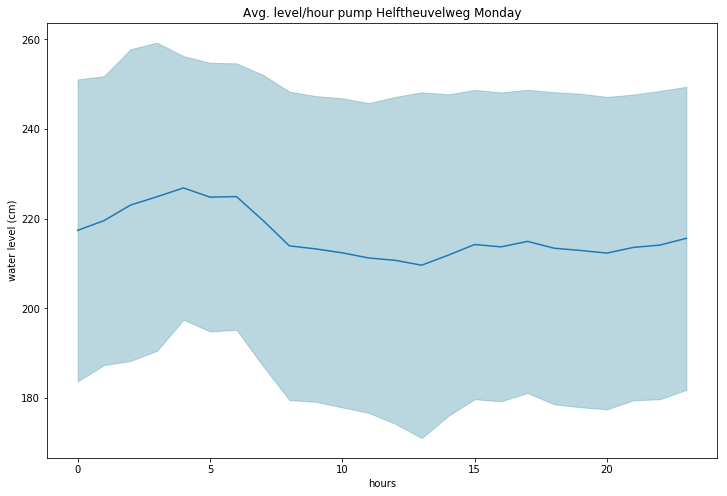

In [49]:
plotData(monday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Monday', 'Plot monday HHW' )

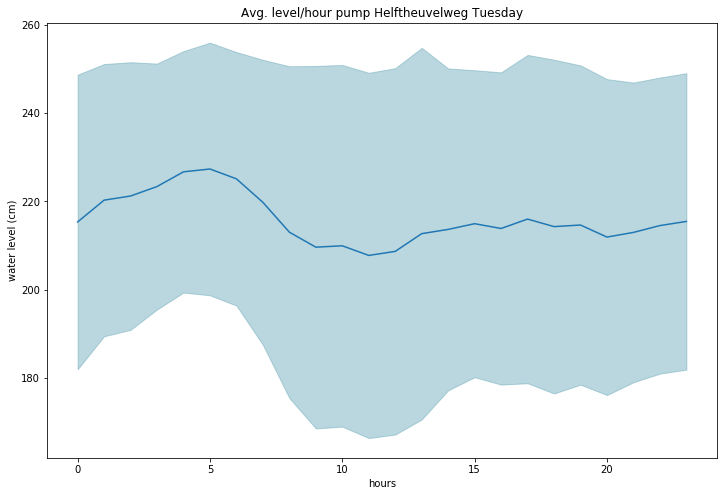

In [50]:
plotData(tuesday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Tuesday', 'Plot tuesday HHW' )

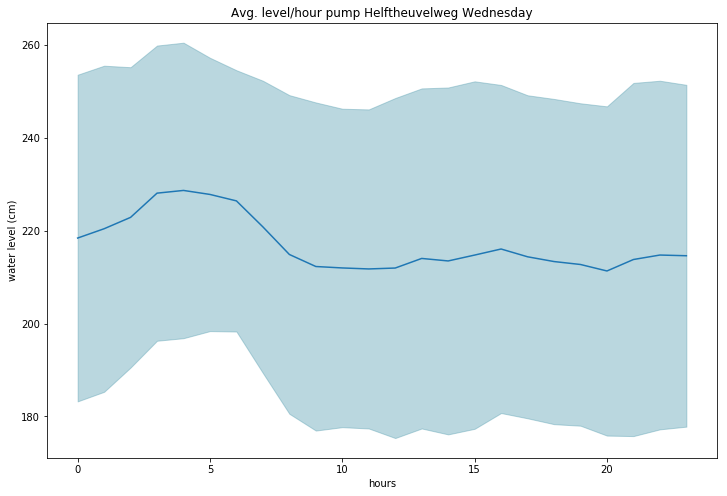

In [51]:
plotData(wednesday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Wednesday', 'Plot wednesday HHW' )

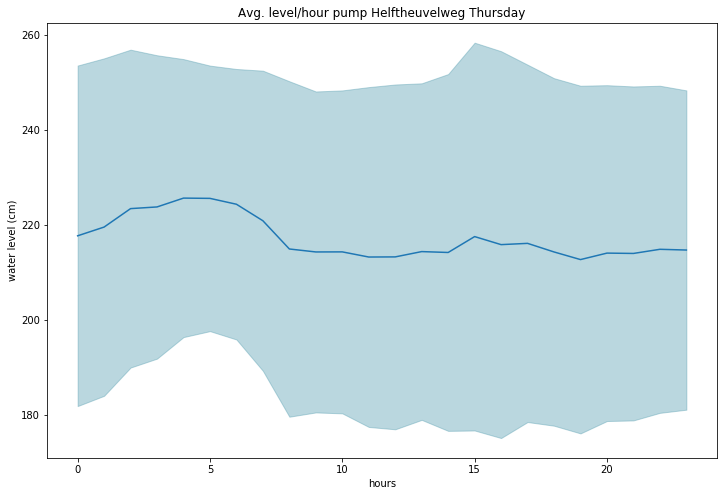

In [52]:
plotData(thursday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Thursday', 'Plot thursday HHW' )

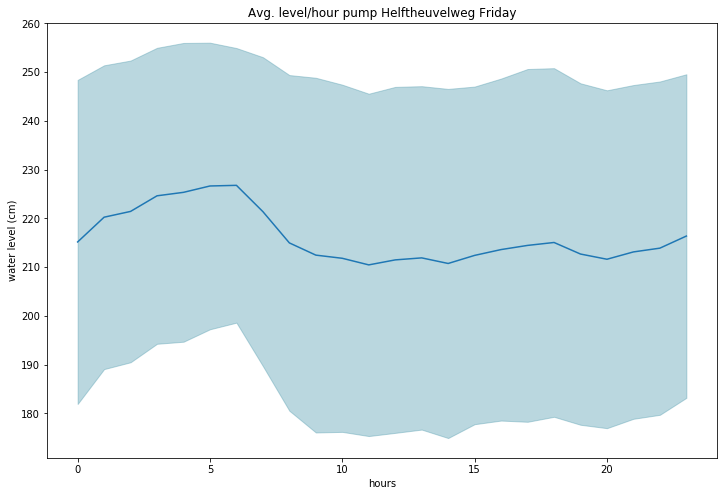

In [53]:
plotData(friday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Friday', 'Plot friday HHW' )

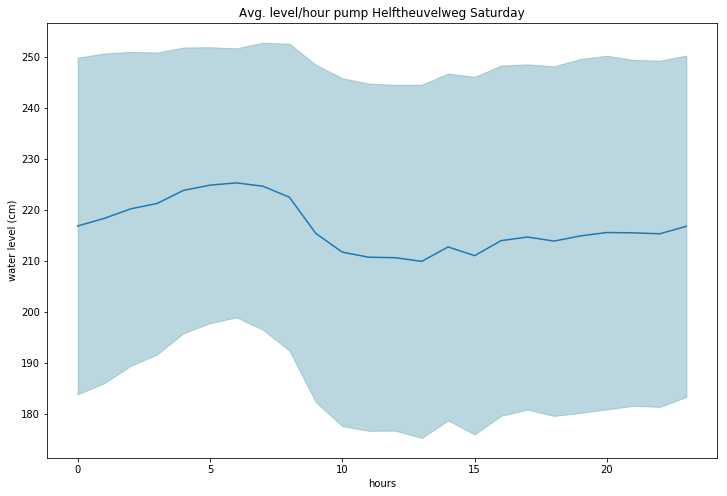

In [54]:
plotData(saturday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Saturday', 'Plot saturday HHW' )

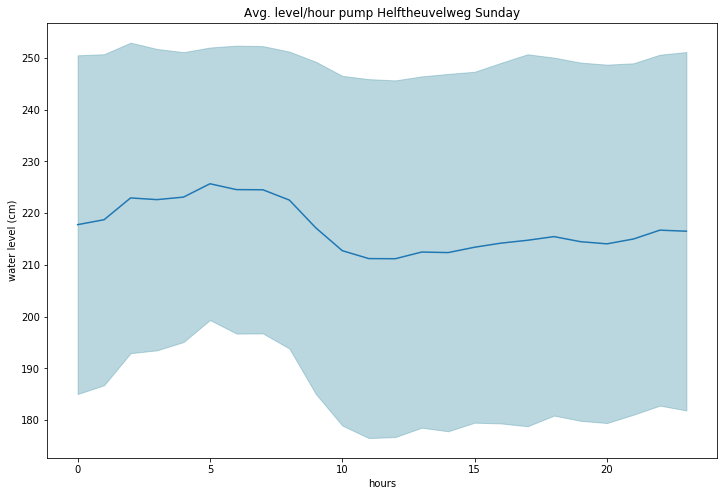

In [55]:
plotData(sunday, '003: Helftheuvelweg Niveau (cm)', 'Avg. level/hour pump Helftheuvelweg Sunday', 'Plot sunday HHW' )